In [27]:
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import ensemble

In [16]:
testdataset = pd.read_csv("Test.csv")
dataset = pd.read_csv("Train.csv")

In [3]:
dataset

,date_time,is_holiday,air_pollution_index,humidity,wind_speed,wind_direction,visibility_in_miles,dew_point,temperature,rain_p_h,snow_p_h,clouds_all,weather_type,weather_description,traffic_volume
0,10/2/12 9:00,None,121,89,2,329,1,1,288.28,0.0,0.0,40,Clouds,scattered clouds,5545
1,10/2/12 10:00,None,178,67,3,330,1,1,289.36,0.0,0.0,75,Clouds,broken clouds,4516
2,10/2/12 11:00,None,113,66,3,329,2,2,289.58,0.0,0.0,90,Clouds,overcast clouds,4767
3,10/2/12 12:00,None,20,66,3,329,5,5,290.13,0.0,0.0,90,Clouds,overcast clouds,5026
4,10/2/12 13:00,None,281,65,3,329,7,7,291.14,0.0,0.0,75,Clouds,broken clouds,4918
5,10/2/12 14:00,None,23,65,3,328,6,6,291.72,0.0,0.0,1,Clear,sky is clear,5181
6,10/2/12 15:00,None,184,64,3,328,7,7,293.17,0.0,0.0,1,Clear,sky is clear,5584
7,10/2/12 16:00,None,167,64,3,327,7,7,293.86,0.0,0.0,1,Clear,sky is clear,6015
8,10/2/12 17:00,None,119,63,3,327,6,6,294.14,0.0,0.0,20,Clouds,few clouds,5791
9,10/2/12 18:00,None,161,63,3,326,3,3,293.10,0.0,0.0,20,Clouds,few clouds,4770


In [52]:
X = dataset[['date_time','is_holiday','air_pollution_index','humidity','wind_speed','wind_direction',
                'dew_point','temperature','clouds_all','weather_type']].values
X_test = testdataset[['date_time','is_holiday','air_pollution_index','humidity','wind_speed','wind_direction',
            'dew_point','temperature','clouds_all','weather_type']].values

In [53]:
y = dataset.iloc[:,-1].values

In [54]:
def datapreprocess(X):
    for i in range(len(X)):
        X[:,0][i] = int(X[:,0][i].split(" ")[1].split(":")[0])
        if(X[:,1][i]=='None'):
            X[:,1][i]=0
        else:
            X[:,1][i]=1
    return X

In [55]:
X = datapreprocess(X)
X_test = datapreprocess(X_test)

In [56]:
labelencoder_x1=LabelEncoder()
X[:,9]=labelencoder_x1.fit_transform(X[:,9])
onehot_encoder = OneHotEncoder(categorical_features=[9])
X = onehot_encoder.fit_transform(X).toarray()
X=X[:,1:]

/Users/nishtha/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/Users/nishtha/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:451: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


In [57]:
#labelencoder_x2=LabelEncoder()
X_test[:,9]=labelencoder_x1.fit_transform(X_test[:,9])
#onehot_encoder = OneHotEncoder()
X_test = onehot_encoder.transform(X_test).toarray()
X_test=X_test[:,1:]

In [58]:
X.shape

(33750, 19)

In [59]:
X_test.shape

(14454, 19)

In [60]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.1, random_state = 42)

In [61]:
print("X_train = "+ str(len(X_train)))
print("X_val = " + str(len(X_val)))
print("X_test = " + str(len(X_test)))

X_train = 30375
X_val = 3375
X_test = 14454


In [62]:
# Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_val = sc.transform(X_val)


In [63]:
X_test = sc.transform(X_test)

In [ ]:
# clf= ensemble.GradientBoostingRegressor(n_estimators=610,max_depth=8,min_samples_split=2,learning_rate=0.1,loss='ls')
# clf.fit(X_train,y_train): 80.36  ... split:0.1

In [64]:
clf= ensemble.GradientBoostingRegressor(n_estimators=3000,max_depth=7,min_samples_split=2,learning_rate=0.1,loss='ls')
clf.fit(X_train,y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=7,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=3000,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [65]:
clf.score(X_val,y_val)

0.8034906479780312

In [83]:
# clf1= ensemble.GradientBoostingRegressor(n_estimators=6000,max_depth=8,min_samples_split=2,learning_rate=0.1,loss='ls')
# clf1.fit(X_train,y_train) :80.42

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=8,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=6000,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [84]:
clf1.score(X_val,y_val)

0.8042133689839728

In [ ]:
clf2= ensemble.GradientBoostingRegressor(n_estimators=9500,max_depth=9,min_samples_split=2,learning_rate=0.1,loss='ls')
clf2.fit(X_train,y_train)

In [ ]:
clf2.score(X_val,y_val)

In [88]:
y_val_pred = clf1.predict(X_val)

In [89]:
y_pred = clf1.predict(X_test)

In [90]:
y_pred

array([ 660.61333879,  754.70570312,  220.72264851, ..., 2220.87257457,
       1757.5115826 , 1337.30534983])

In [91]:
y_pred_round = y_pred.round()

In [92]:
y_val

array([2693, 6566, 1887, ...,  316, 2137, 1474])

In [93]:
y_val_pred.round()

array([1707., 5387., 5089., ...,  580., 2164.,  880.])

In [94]:
date_time = testdataset.iloc[:,0]

In [95]:
with open('80.42.csv' , 'a') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerow([])
csvFile.close()

In [96]:
for i in range(len(X_test)):
    col1 = date_time[i]
    #print(col1)
    col2 = y_pred_round[i]
    row = [col1,col2]
    with open('80.42.csv', 'a') as csvFile:
        writer = csv.writer(csvFile)
        writer.writerow(row)
    csvFile.close()

In [ ]:
[0]

In [77]:
with open('80.42.csv','rt')as f:
  data = csv.reader(f)
  for row in data:
        print(row)

['date_time', 'traffic_volume']
['2017-05-18 00:00:00', '507.0']
['2017-05-18 00:00:00', '568.0']
['2017-05-18 00:00:00', '709.0']
['2017-05-18 01:00:00', '173.0']
['2017-05-18 01:00:00', '588.0']
['2017-05-18 02:00:00', '574.0']
['2017-05-18 02:00:00', '-93.0']
['2017-05-18 02:00:00', '365.0']
['2017-05-18 03:00:00', '-196.0']
['2017-05-18 03:00:00', '-27.0']
['2017-05-18 03:00:00', '265.0']
['2017-05-18 04:00:00', '536.0']
['2017-05-18 04:00:00', '658.0']
['2017-05-18 04:00:00', '782.0']
['2017-05-18 05:00:00', '2079.0']
['2017-05-18 05:00:00', '2172.0']
['2017-05-18 05:00:00', '2401.0']
['2017-05-18 06:00:00', '4167.0']
['2017-05-18 06:00:00', '4345.0']
['2017-05-18 07:00:00', '5158.0']
['2017-05-18 07:00:00', '4323.0']
['2017-05-18 08:00:00', '4360.0']
['2017-05-18 08:00:00', '5264.0']
['2017-05-18 08:00:00', '5524.0']
['2017-05-18 09:00:00', '4853.0']
['2017-05-18 09:00:00', '4970.0']
['2017-05-18 09:00:00', '5129.0']
['2017-05-18 10:00:00', '3942.0']
['2017-05-18 10:00:00', '4325

['2017-07-05 01:00:00', '499.0']
['2017-07-05 01:00:00', '-1.0']
['2017-07-05 02:00:00', '349.0']
['2017-07-05 02:00:00', '168.0']
['2017-07-05 03:00:00', '789.0']
['2017-07-05 04:00:00', '1063.0']
['2017-07-05 05:00:00', '1935.0']
['2017-07-05 06:00:00', '3382.0']
['2017-07-05 07:00:00', '5443.0']
['2017-07-05 08:00:00', '4530.0']
['2017-07-05 09:00:00', '4075.0']
['2017-07-05 09:00:00', '4096.0']
['2017-07-05 10:00:00', '4053.0']
['2017-07-05 11:00:00', '4578.0']
['2017-07-05 12:00:00', '5252.0']
['2017-07-05 13:00:00', '4799.0']
['2017-07-05 14:00:00', '5379.0']
['2017-07-05 15:00:00', '4895.0']
['2017-07-05 16:00:00', '4942.0']
['2017-07-05 17:00:00', '5068.0']
['2017-07-05 18:00:00', '4049.0']
['2017-07-05 19:00:00', '3361.0']
['2017-07-05 20:00:00', '2607.0']
['2017-07-05 21:00:00', '3107.0']
['2017-07-05 22:00:00', '2491.0']
['2017-07-05 23:00:00', '2100.0']
['2017-07-06 00:00:00', '1314.0']
['2017-07-06 01:00:00', '842.0']
['2017-07-06 02:00:00', '265.0']
['2017-07-06 03:00:00'

['2017-08-17 16:00:00', '6005.0']
['2017-08-17 17:00:00', '5382.0']
['2017-08-17 18:00:00', '4170.0']
['2017-08-17 19:00:00', '3269.0']
['2017-08-17 20:00:00', '2706.0']
['2017-08-17 21:00:00', '2523.0']
['2017-08-17 22:00:00', '1818.0']
['2017-08-17 23:00:00', '1646.0']
['2017-08-18 00:00:00', '82.0']
['2017-08-18 01:00:00', '116.0']
['2017-08-18 02:00:00', '-378.0']
['2017-08-18 03:00:00', '336.0']
['2017-08-18 04:00:00', '463.0']
['2017-08-18 05:00:00', '1823.0']
['2017-08-18 06:00:00', '5301.0']
['2017-08-18 07:00:00', '4352.0']
['2017-08-18 08:00:00', '3772.0']
['2017-08-18 09:00:00', '4574.0']
['2017-08-18 10:00:00', '4671.0']
['2017-08-18 10:00:00', '3865.0']
['2017-08-18 11:00:00', '4557.0']
['2017-08-18 11:00:00', '4783.0']
['2017-08-18 12:00:00', '5212.0']
['2017-08-18 12:00:00', '5303.0']
['2017-08-18 12:00:00', '4753.0']
['2017-08-18 13:00:00', '4496.0']
['2017-08-18 13:00:00', '4502.0']
['2017-08-18 13:00:00', '4371.0']
['2017-08-18 13:00:00', '4706.0']
['2017-08-18 14:00:

['2017-09-30 20:00:00', '2997.0']
['2017-09-30 21:00:00', '2744.0']
['2017-09-30 22:00:00', '2095.0']
['2017-09-30 23:00:00', '1880.0']
['2017-10-01 00:00:00', '751.0']
['2017-10-01 01:00:00', '464.0']
['2017-10-01 02:00:00', '484.0']
['2017-10-01 03:00:00', '735.0']
['2017-10-01 03:00:00', '739.0']
['2017-10-01 04:00:00', '175.0']
['2017-10-01 05:00:00', '2284.0']
['2017-10-01 06:00:00', '4461.0']
['2017-10-01 07:00:00', '4583.0']
['2017-10-01 07:00:00', '4688.0']
['2017-10-01 08:00:00', '3928.0']
['2017-10-01 09:00:00', '4233.0']
['2017-10-01 10:00:00', '3898.0']
['2017-10-01 11:00:00', '4439.0']
['2017-10-01 12:00:00', '4748.0']
['2017-10-01 13:00:00', '4995.0']
['2017-10-01 13:00:00', '4693.0']
['2017-10-01 14:00:00', '4846.0']
['2017-10-01 15:00:00', '4905.0']
['2017-10-01 16:00:00', '5839.0']
['2017-10-01 17:00:00', '5011.0']
['2017-10-01 18:00:00', '4697.0']
['2017-10-01 19:00:00', '3521.0']
['2017-10-01 20:00:00', '2811.0']
['2017-10-01 21:00:00', '1998.0']
['2017-10-01 22:00:0

['2017-11-17 10:00:00', '3724.0']
['2017-11-17 10:00:00', '3964.0']
['2017-11-17 10:00:00', '3962.0']
['2017-11-17 11:00:00', '4817.0']
['2017-11-17 11:00:00', '4985.0']
['2017-11-17 11:00:00', '4671.0']
['2017-11-17 12:00:00', '3927.0']
['2017-11-17 12:00:00', '4629.0']
['2017-11-17 12:00:00', '5066.0']
['2017-11-17 12:00:00', '4877.0']
['2017-11-17 13:00:00', '4666.0']
['2017-11-17 13:00:00', '4738.0']
['2017-11-17 13:00:00', '4670.0']
['2017-11-17 14:00:00', '5301.0']
['2017-11-17 14:00:00', '4984.0']
['2017-11-17 14:00:00', '5059.0']
['2017-11-17 14:00:00', '5289.0']
['2017-11-17 15:00:00', '5422.0']
['2017-11-17 15:00:00', '5656.0']
['2017-11-17 15:00:00', '5479.0']
['2017-11-17 16:00:00', '5867.0']
['2017-11-17 16:00:00', '5899.0']
['2017-11-17 16:00:00', '6186.0']
['2017-11-17 17:00:00', '5611.0']
['2017-11-17 17:00:00', '5347.0']
['2017-11-17 18:00:00', '4179.0']
['2017-11-17 18:00:00', '4080.0']
['2017-11-17 19:00:00', '3386.0']
['2017-11-17 20:00:00', '2700.0']
['2017-11-17 2

['2018-01-05 17:00:00', '5120.0']
['2018-01-05 18:00:00', '3962.0']
['2018-01-05 19:00:00', '2931.0']
['2018-01-05 20:00:00', '3019.0']
['2018-01-05 21:00:00', '2097.0']
['2018-01-05 22:00:00', '2389.0']
['2018-01-05 23:00:00', '1783.0']
['2018-01-06 00:00:00', '305.0']
['2018-01-06 01:00:00', '-429.0']
['2018-01-06 02:00:00', '-445.0']
['2018-01-06 03:00:00', '-771.0']
['2018-01-06 04:00:00', '586.0']
['2018-01-06 05:00:00', '-104.0']
['2018-01-06 06:00:00', '4150.0']
['2018-01-06 07:00:00', '4715.0']
['2018-01-06 08:00:00', '4929.0']
['2018-01-06 09:00:00', '4451.0']
['2018-01-06 10:00:00', '4015.0']
['2018-01-06 11:00:00', '4565.0']
['2018-01-06 12:00:00', '4791.0']
['2018-01-06 13:00:00', '4497.0']
['2018-01-06 14:00:00', '4810.0']
['2018-01-06 15:00:00', '5426.0']
['2018-01-06 16:00:00', '5436.0']
['2018-01-06 17:00:00', '4910.0']
['2018-01-06 18:00:00', '3599.0']
['2018-01-06 19:00:00', '2763.0']
['2018-01-06 20:00:00', '2955.0']
['2018-01-06 21:00:00', '2396.0']
['2018-01-06 22:

['2018-02-18 02:00:00', '149.0']
['2018-02-18 03:00:00', '515.0']
['2018-02-18 04:00:00', '696.0']
['2018-02-18 05:00:00', '1967.0']
['2018-02-18 06:00:00', '3936.0']
['2018-02-18 07:00:00', '4989.0']
['2018-02-18 08:00:00', '4637.0']
['2018-02-18 09:00:00', '4206.0']
['2018-02-18 10:00:00', '3440.0']
['2018-02-18 11:00:00', '4148.0']
['2018-02-18 12:00:00', '4775.0']
['2018-02-18 13:00:00', '4966.0']
['2018-02-18 14:00:00', '4606.0']
['2018-02-18 15:00:00', '5065.0']
['2018-02-18 16:00:00', '6347.0']
['2018-02-18 17:00:00', '6027.0']
['2018-02-18 18:00:00', '4453.0']
['2018-02-18 19:00:00', '3768.0']
['2018-02-18 20:00:00', '2807.0']
['2018-02-18 21:00:00', '2597.0']
['2018-02-18 22:00:00', '1853.0']
['2018-02-18 23:00:00', '1519.0']
['2018-02-19 00:00:00', '1247.0']
['2018-02-19 01:00:00', '800.0']
['2018-02-19 02:00:00', '574.0']
['2018-02-19 03:00:00', '125.0']
['2018-02-19 04:00:00', '672.0']
['2018-02-19 05:00:00', '736.0']
['2018-02-19 06:00:00', '4291.0']
['2018-02-19 07:00:00'

['2018-04-08 18:00:00', '3862.0']
['2018-04-08 18:00:00', '4169.0']
['2018-04-08 19:00:00', '3237.0']
['2018-04-08 19:00:00', '2847.0']
['2018-04-08 19:00:00', '3795.0']
['2018-04-08 20:00:00', '2614.0']
['2018-04-08 20:00:00', '2493.0']
['2018-04-08 21:00:00', '2358.0']
['2018-04-08 21:00:00', '2357.0']
['2018-04-08 22:00:00', '1928.0']
['2018-04-08 22:00:00', '2040.0']
['2018-04-08 23:00:00', '876.0']
['2018-04-08 23:00:00', '1391.0']
['2018-04-09 00:00:00', '849.0']
['2018-04-09 00:00:00', '-205.0']
['2018-04-09 01:00:00', '529.0']
['2018-04-09 01:00:00', '767.0']
['2018-04-09 02:00:00', '41.0']
['2018-04-09 02:00:00', '328.0']
['2018-04-09 03:00:00', '-185.0']
['2018-04-09 03:00:00', '-146.0']
['2018-04-09 04:00:00', '56.0']
['2018-04-09 05:00:00', '2902.0']
['2018-04-09 06:00:00', '3894.0']
['2018-04-09 06:00:00', '4453.0']
['2018-04-09 07:00:00', '4242.0']
['2018-04-09 07:00:00', '5031.0']
['2018-04-09 08:00:00', '4945.0']
['2018-04-09 08:00:00', '4271.0']
['2018-04-09 09:00:00',

['2018-05-18 07:00:00', '4059.0']
['2018-05-18 08:00:00', '4504.0']
['2018-05-18 09:00:00', '4475.0']
['2018-05-18 10:00:00', '4416.0']
['2018-05-18 11:00:00', '3526.0']
['2018-05-18 12:00:00', '3815.0']
['2018-05-18 13:00:00', '4532.0']
['2018-05-18 14:00:00', '5413.0']
['2018-05-18 15:00:00', '6177.0']
['2018-05-18 16:00:00', '6127.0']
['2018-05-18 17:00:00', '5973.0']
['2018-05-18 18:00:00', '4224.0']
['2018-05-18 19:00:00', '3066.0']
['2018-05-18 20:00:00', '3148.0']
['2018-05-18 21:00:00', '2633.0']
['2018-05-18 22:00:00', '1921.0']
['2018-05-18 22:00:00', '2104.0']
['2018-05-18 23:00:00', '1967.0']
['2018-05-19 00:00:00', '898.0']
['2018-05-19 01:00:00', '340.0']
['2018-05-19 02:00:00', '572.0']
['2018-05-19 03:00:00', '403.0']
['2018-05-19 04:00:00', '774.0']
['2018-05-19 05:00:00', '2504.0']
['2018-05-19 06:00:00', '2977.0']
['2018-05-19 07:00:00', '4013.0']
['2018-05-19 08:00:00', '4290.0']
['2018-05-19 09:00:00', '4002.0']
['2018-05-19 09:00:00', '4523.0']
['2018-05-19 10:00:

['2018-07-02 03:00:00', '540.0']
['2018-07-02 04:00:00', '856.0']
['2018-07-02 05:00:00', '1844.0']
['2018-07-02 06:00:00', '4657.0']
['2018-07-02 07:00:00', '5056.0']
['2018-07-02 08:00:00', '4931.0']
['2018-07-02 09:00:00', '4447.0']
['2018-07-02 10:00:00', '5455.0']
['2018-07-02 11:00:00', '3887.0']
['2018-07-02 12:00:00', '4048.0']
['2018-07-02 13:00:00', '4155.0']
['2018-07-02 14:00:00', '3985.0']
['2018-07-02 15:00:00', '6522.0']
['2018-07-02 16:00:00', '4939.0']
['2018-07-02 17:00:00', '5424.0']
['2018-07-02 18:00:00', '3736.0']
['2018-07-02 19:00:00', '3752.0']
['2018-07-02 20:00:00', '3137.0']
['2018-07-02 21:00:00', '2671.0']
['2018-07-02 22:00:00', '2068.0']
['2018-07-02 23:00:00', '806.0']
['2018-07-03 00:00:00', '821.0']
['2018-07-03 01:00:00', '828.0']
['2018-07-03 02:00:00', '212.0']
['2018-07-03 03:00:00', '73.0']
['2018-07-03 04:00:00', '908.0']
['2018-07-03 04:00:00', '-212.0']
['2018-07-03 05:00:00', '915.0']
['2018-07-03 06:00:00', '4384.0']
['2018-07-03 07:00:00', 

['2018-08-17 08:00:00', '4143.0']
['2018-08-17 09:00:00', '4325.0']
['2018-08-17 10:00:00', '4614.0']
['2018-08-17 11:00:00', '4161.0']
['2018-08-17 12:00:00', '4017.0']
['2018-08-17 13:00:00', '4373.0']
['2018-08-17 14:00:00', '4599.0']
['2018-08-17 15:00:00', '6348.0']
['2018-08-17 16:00:00', '5296.0']
['2018-08-17 17:00:00', '4906.0']
['2018-08-17 18:00:00', '3594.0']
['2018-08-17 19:00:00', '3191.0']
['2018-08-17 20:00:00', '3249.0']
['2018-08-17 21:00:00', '2554.0']
['2018-08-17 22:00:00', '1531.0']
['2018-08-17 23:00:00', '1447.0']
['2018-08-18 00:00:00', '908.0']
['2018-08-18 01:00:00', '-221.0']
['2018-08-18 02:00:00', '612.0']
['2018-08-18 02:00:00', '22.0']
['2018-08-18 03:00:00', '546.0']
['2018-08-18 03:00:00', '439.0']
['2018-08-18 04:00:00', '485.0']
['2018-08-18 04:00:00', '665.0']
['2018-08-18 05:00:00', '2180.0']
['2018-08-18 05:00:00', '2342.0']
['2018-08-18 06:00:00', '5307.0']
['2018-08-18 06:00:00', '4036.0']
['2018-08-18 07:00:00', '5383.0']
['2018-08-18 07:00:00'

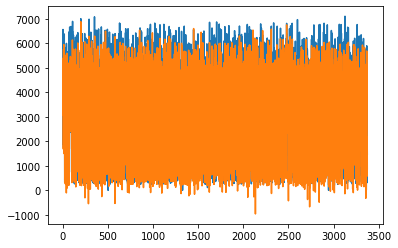

In [97]:

fig, ax = plt.subplots()
ax.plot(y_val)
ax.plot(y_val_pred)